# Strongly Connected Components

A strongly connected graph is a directed graph, where every vertex is reachable from every other vertex. Strongly Connected Compnents of a directed graph are subgraphs within itself that are strongly connected. This jupyter notebook implement an algorithm to compute the number of vertex in each strongly connected component of a directed graph using Depth-First Search (DFS) algorithm.

## Depth-First Search Algorithm

In [1]:
def dfs(graph, start_vertex, counter, visited, finishing_time, if_):
    """
    An interative approach to implement DFS algorithms using stack.
    
    :param graph: A dictionary representing the graph with vertex as key and value is a set of all 
                  connecetd vertex such that key is tail.
    :param start_vertex: An integer that defines the starting vertex. for the algorithm.
    :param counter: An integer denoting the number of vertex with all the visited adjacent vertices.
    :param visited: A set containting all vertices that is visited by the algorithm.
    :param finishing_time: A dictionary contains the finishing time of vertices visited by this function.
    :param if_: A list indicating if a vertex has all visited adjacent vertices, 1 if yes otherwise 0. 
    """
    # Initiate a stack with start_vertex in it.
    stack = [start_vertex]
    while stack:
        # Check the last element in the stack(First In, Last Out), if it is in visited set
        current_vertex = stack[-1]
        if current_vertex not in visited:
            # Add current vertex to the visited set
            visited.add(current_vertex)
            # Add adjacent vertices (that are not in visited set) to the stack
            stack.extend(graph[current_vertex] - visited)
        elif not graph[current_vertex] - visited:
            # This mean all adjacent vertices are present in visited set, thus remove current vertex from the stack
            stack.pop()
            # Update if_ list to indicate that current vertex has all visited adjacent vertices 
            if if_[current_vertex-1] == 0:
                finishing_time[counter] = current_vertex
                if_[current_vertex-1] = 1
                counter += 1
    return counter

In [2]:
def dfs_loop(graph, ft=None):
    """
    Implement Depth-First Search algorithm.
    
    :param graph: A dictionary representing the graph with vertex as key and value is a set of all 
                  connecetd vertex such that key is tail.
    :param ft: A dictionary, which is used to call starting vertex in specific order. 
    :return: A dictionary and a list, dictionary contains the finishing time of each vertex and list 
             contains length of finishing time dictionary at the end of each call to dfs function. 
    """
    # Initiate empty data structures to store required quantities
    finishing_time = dict()
    visited = set()
    n_scc = list()
    
    counter = 1
    n_graph = len(graph)
    if_finished = [0]*n_graph
    
    # Iterate over each vertex and call dfs function, if vertex is not in visited set.
    for i in range(n_graph, 0, -1):
        vert = i
        if ft:
            vert = ft[i]
        if vert not in visited:
            counter = dfs(graph, vert, counter, visited, finishing_time, if_finished)
            n_scc.append(len(finishing_time))
            
    return finishing_time, n_scc

## Kosaraju's Two-Pass Algorithm

Kosaraju's Two-Pass algorithm implement depth-first search algorithm two times. First on the reverse graph to compute the finishing time of each vertex. Then it implement depth-first search on the actual graph but starting vertex is selected based on the finishing time of DFS algorithm on the reverse graph.

In [3]:
def size_scc(graph, graph_rev):
    """
    Implement Kosaraju's Two-Pass algorithm using DFS algorithm.
    
    :param graph: A dictionary representing the graph with vertex as key and value is a set of all 
                  connecetd vertex such that key is tail.
    :param graph_rev: A dictionary representing the reverse graph
    :return: a list containing length of each strongly connected components
    """
    # implement dfs on graph_rev to compute finishing time
    finishing_time = dfs_loop(graph_rev)[0]

    # implement dfs on the graph in the descending order of finishing_time
    ft, l_ssc = dfs_loop(graph, finishing_time)

    return [l_ssc[0]] + [l_ssc[ik] - l_ssc[ik - 1] for ik in range(1, len(l_ssc))]

## Examples

### Graph1

This directed graph has 9 vertex and 3 subgraphs which are strongly connected components, i.e. [1, 4, 7], [3, 6, 9], and [2, 5, 8].

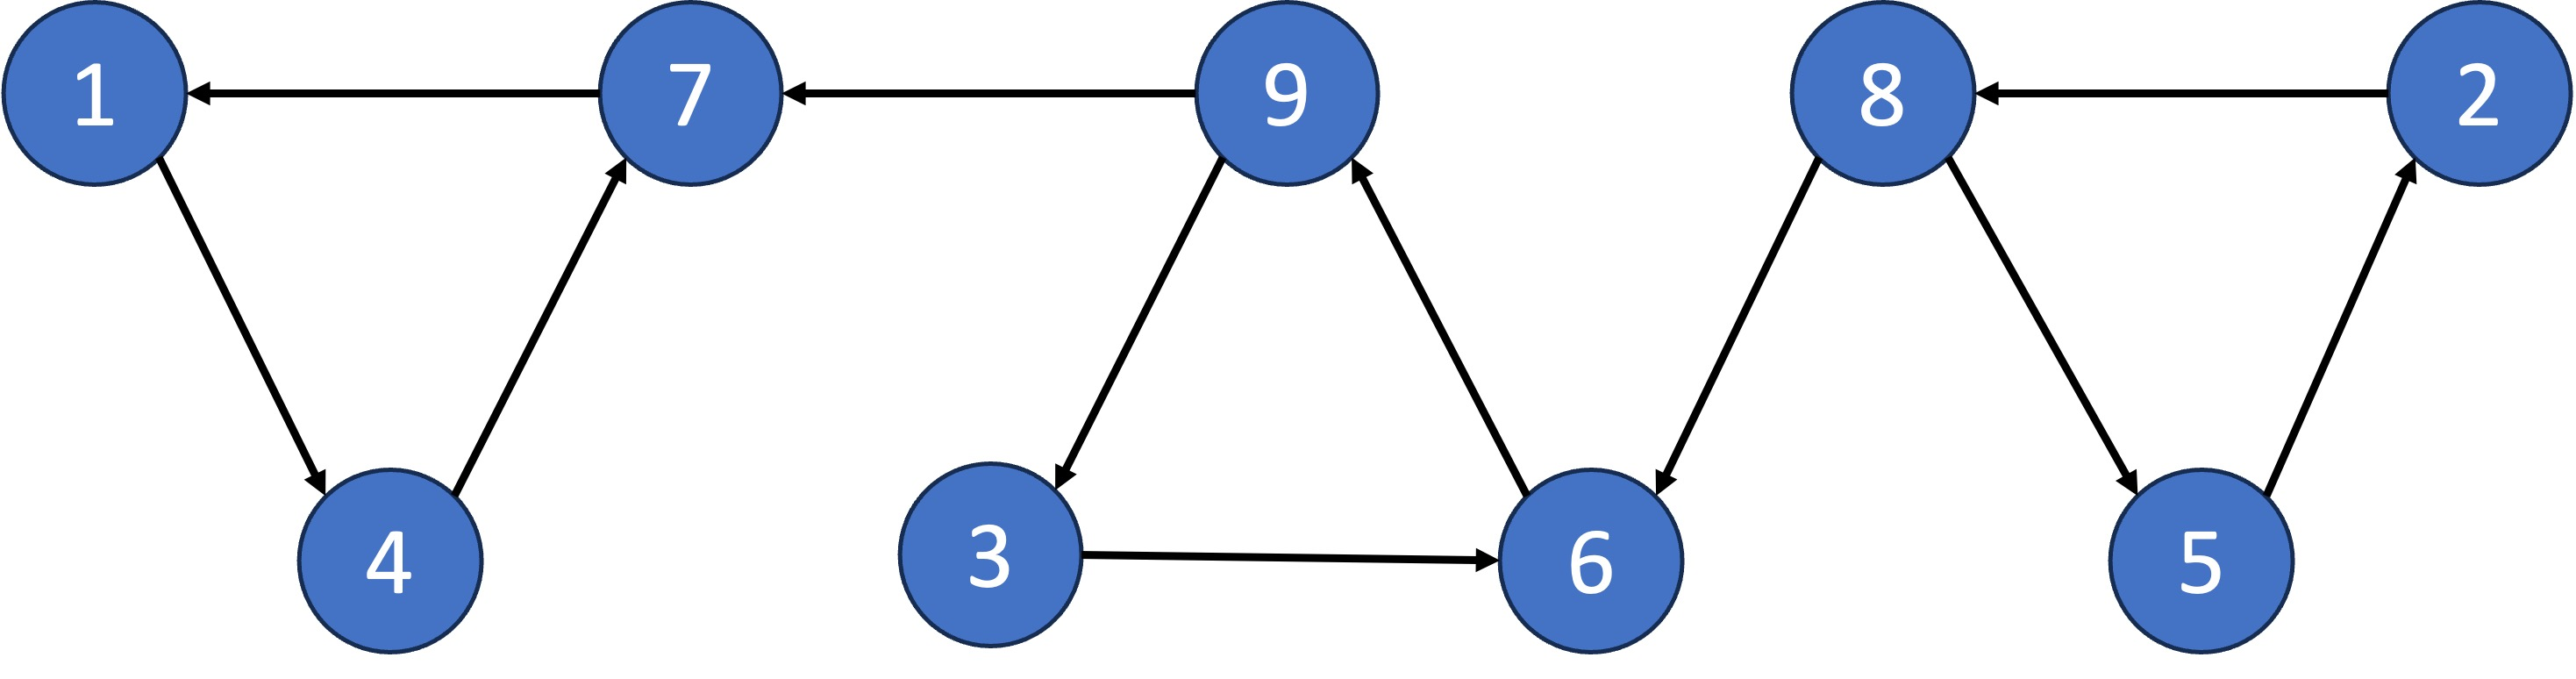

In [4]:
graph1 = {1: {4}, 4: {7}, 7: {1}, 9: {3, 7}, 3: {6}, 6: {9}, 8: {5, 6}, 5: {2}, 2: {8}}
graph1_rev = {1: {7}, 7: {4, 9}, 4: {1}, 9: {6}, 6: {3, 8}, 3: {9}, 8: {2}, 2: {5}, 5: {8}}

print('Length of different strongly connected components are ', size_scc(graph1, graph1_rev))

Length of different strongly connected components are  [3, 3, 3]


### Graph 2

This directed graph has 12 vertex and 4 subgraphs which are strongly connected components, i.e. [1, 2, 3], [4], [5, 6, 7, 8], and [9, 10, 11].

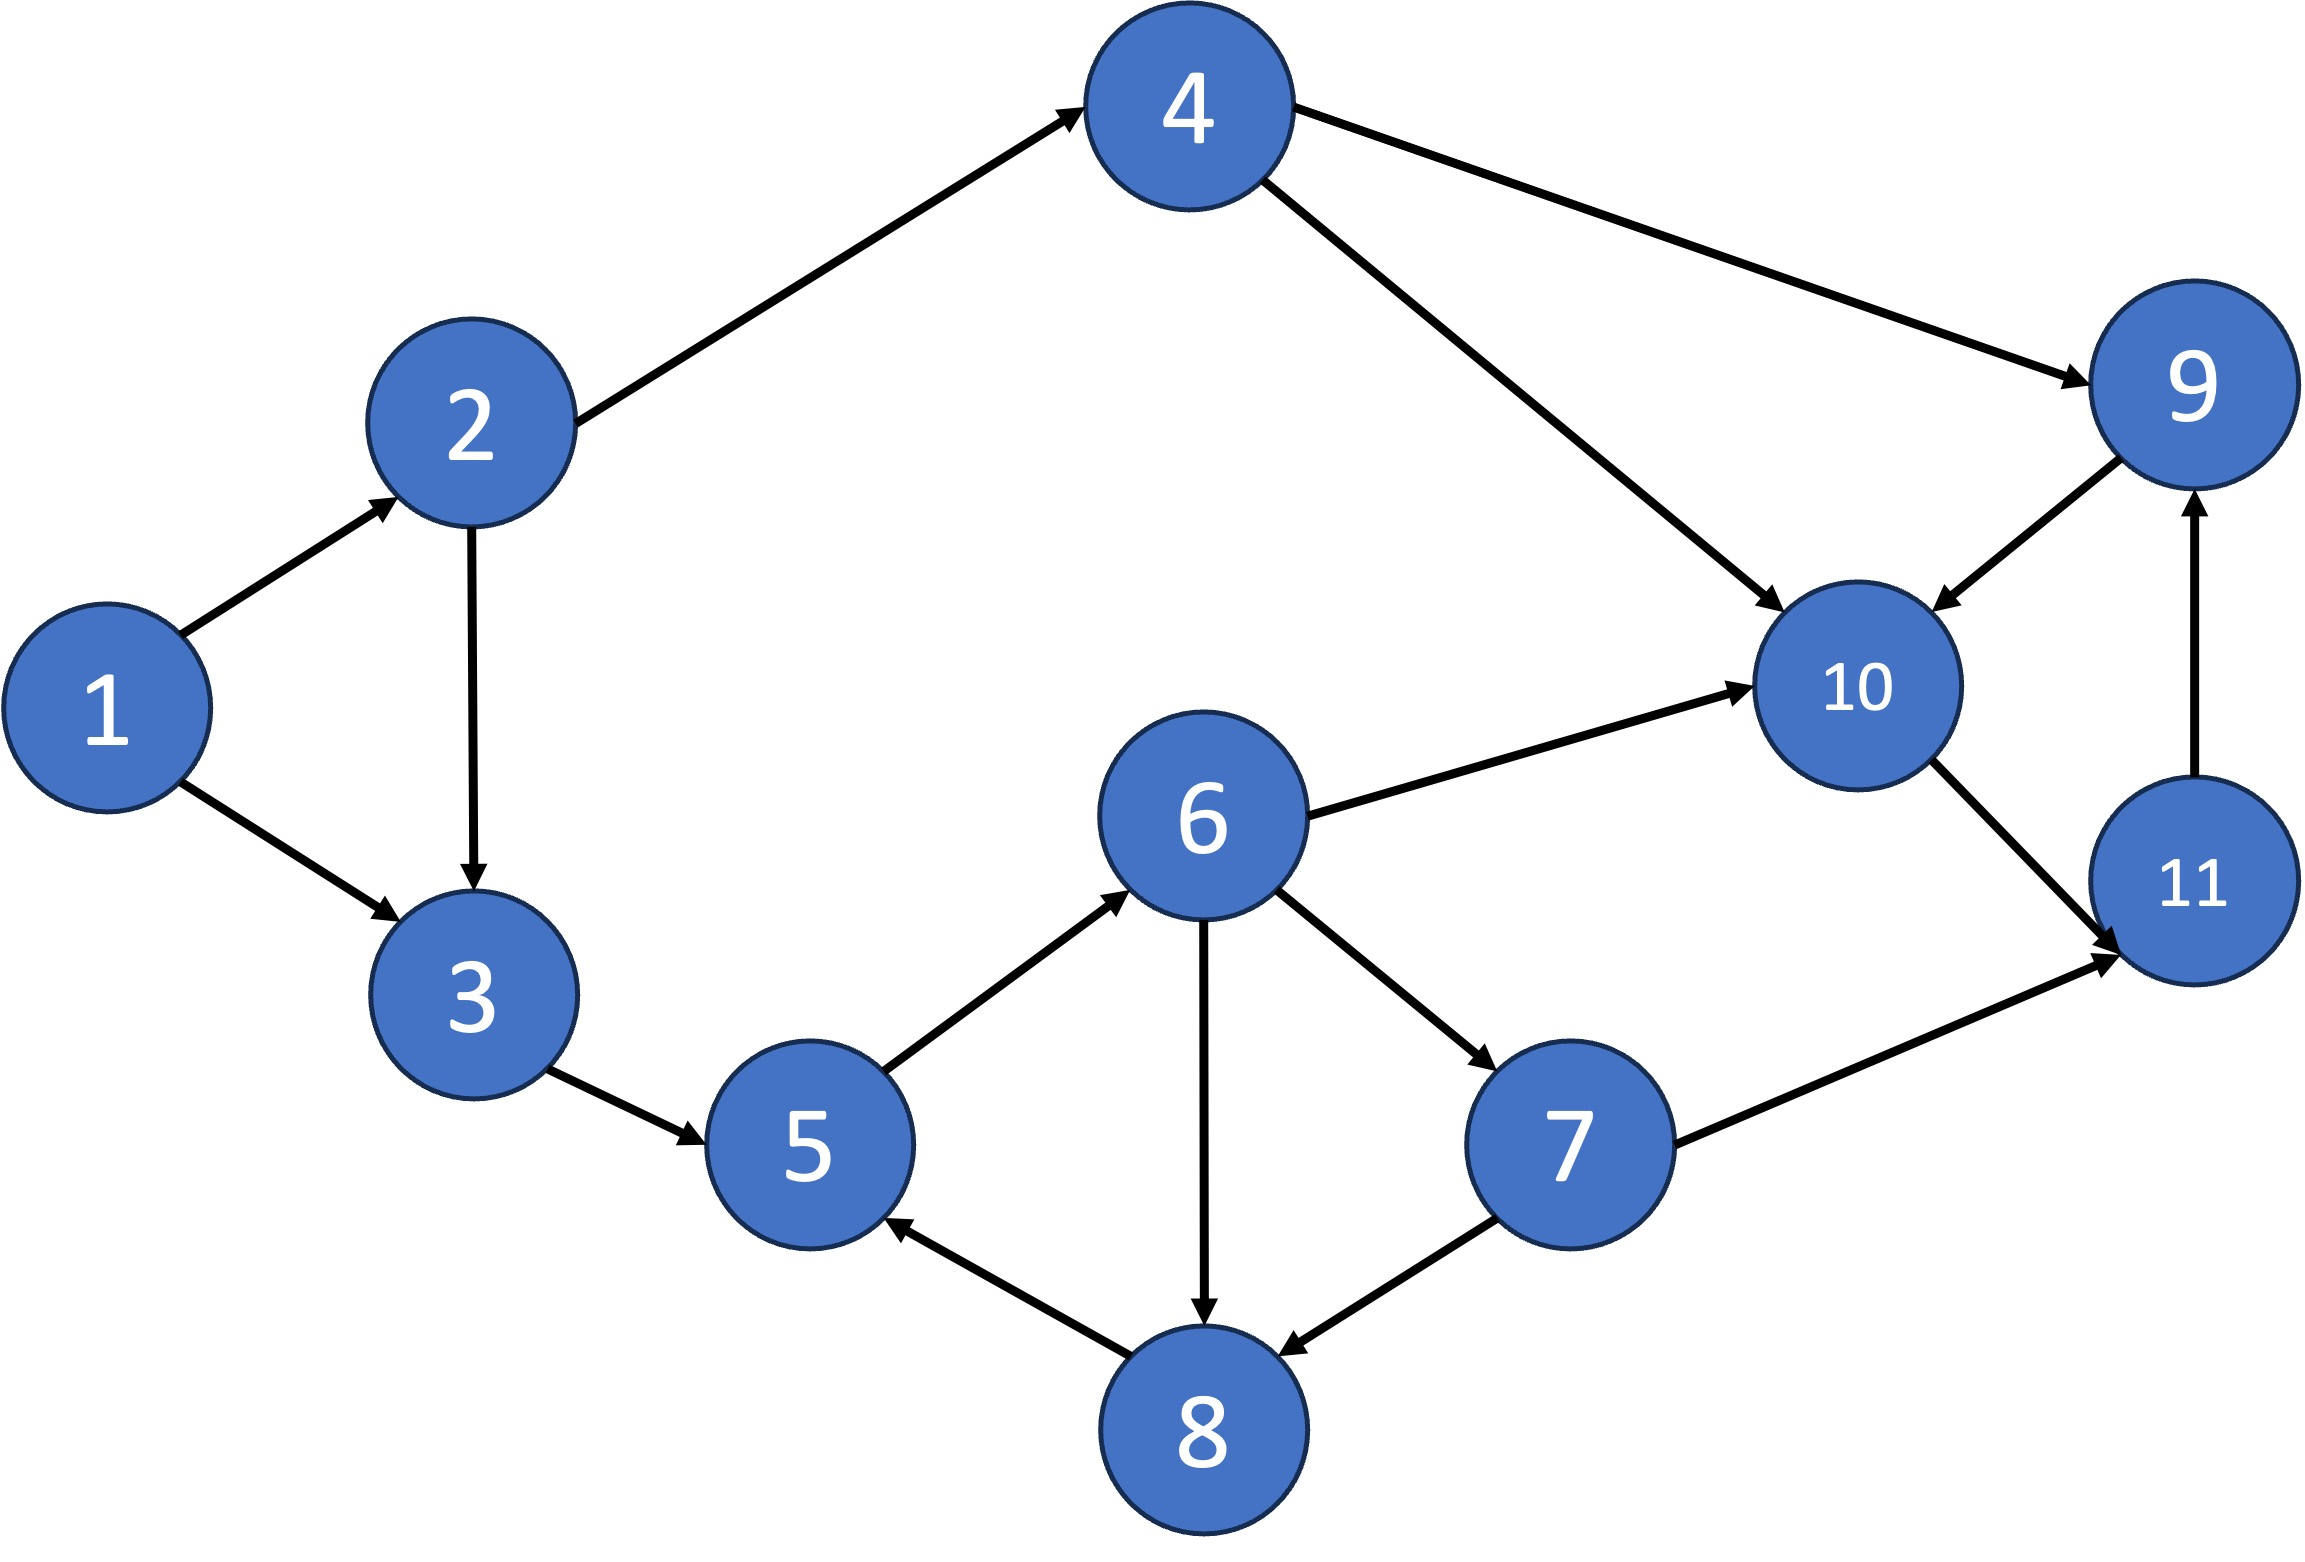

In [5]:
graph2 = {1: {2}, 2: {3, 4}, 3: {1, 5, 6}, 4: {9, 10}, 5: {6}, 6: {7, 8, 9}, 7: {8, 11}, 8: {5}, 9: {10}, 10: {11},
          11: {9}}
graph2_rev = {1: {3}, 2: {1}, 3: {2}, 4: {2}, 5: {3, 8}, 6: {3, 5}, 7: {6}, 8: {6, 7}, 9: {4, 6, 11}, 10: {4, 9},
              11: {10}}
print('Length of different strongly connected components are ', size_scc(graph2, graph2_rev))

Length of different strongly connected components are  [3, 4, 1, 3]
